In [0]:
#Import data file from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google.colab import files

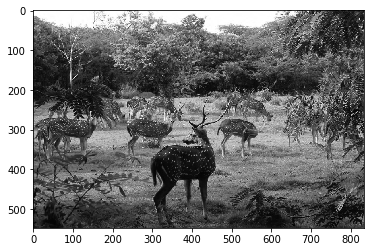

(548, 833)
80199.07914071581


In [0]:
#Grayscale of Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function for converting color image to Grayscale
def rgb2gray(rgbimg):
  return np.dot(rgbimg[...,:3], [0.2989, 0.5870, 0.1140])

img= mpimg.imread('/content/gdrive/My Drive/Datasets/38.jpg')
grayimg= rgb2gray(img)
imgplot= plt.imshow(grayimg, cmap=plt.get_cmap('gray'))
plt.show()
print(np.shape(grayimg))

J = np.linalg.norm(grayimg, 'fro')
print(J)

In [0]:
#Defining Principal Component Analysis Function(PCA)

def PCA1(matrix1,n):               # Taking matrix(matrix1) and fraction of the components(n) needed
  num_of_data= np.shape(matrix1)[0]
  dim= np.shape(matrix1)[1]
 
  # matrix1=np.transpose(matrix1)
  

  #Centering data by taking mean
  mean_vec= np.mean(matrix1,axis=1)
  covariance_matrix1= np.dot(np.transpose(matrix1),matrix1)
  covariance_matrix= np.cov(np.transpose(matrix1))
  covariance_matrix=covariance_matrix*((num_of_data-1)/(num_of_data))
  eig_vals, eig_vecs= np.linalg.eig(covariance_matrix)                              #Finding Eigen Values and Vectors

  eig_pairs = [((eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]         #Eigen Pairs by combining eigen values and eigen vectors
  eig_pairs.sort()
  eig_pairs.reverse()

  new_eig_vecs= [(eig_pairs[i][1].reshape(dim,1)) for i in range(n)]
  print(np.shape(new_eig_vecs))
  

  matrix1=np.array(matrix1)
  new_eig_vecs=np.array(new_eig_vecs)
  new_eig_vecs=np.reshape(np.transpose(new_eig_vecs),[dim,n])


  new_matrix1= np.dot((matrix1), (new_eig_vecs))
  new_matrix=np.dot(new_matrix1,np.transpose(new_eig_vecs))

  return (new_matrix)


(83, 833, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


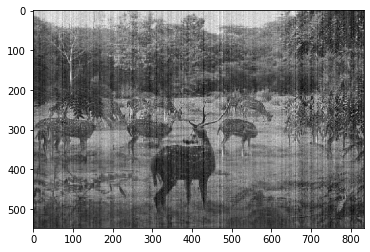

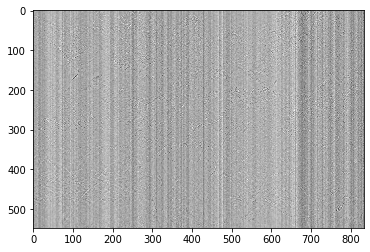

98.20272712272435


In [0]:
# Applying PCA on Top N Principal Components

num_of_data= np.shape(grayimg)[0]
dim= np.shape(grayimg)[1]

# Using top 10% principal component

x= PCA1(grayimg,int((10/100)*dim))          # x is Recontructed Image
x=x.astype('float')
imgplot= plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

y= x-grayimg                                # y is Error in Reconstructed Image
y=y.astype('float')
imgplot= plt.imshow(y, cmap=plt.get_cmap('gray'))
plt.show()

J1=np.linalg.norm(x,'fro')  
Reconstruct_Quality_1 = (J1/J)*100                 
print(Reconstruct_Quality_1)


In [0]:
#Defining PCA for random N% dimensions

def PCA2(matrix1,n):                      # Taking matrix(matrix1) and fraction of the components(n) needed
  num_of_data= np.shape(matrix1)[0]
  dim= np.shape(matrix1)[1]
 
  # matrix1=np.transpose(matrix1)
  

  #Centering data by taking mean
  mean_vec= np.mean(matrix1,axis=1)
  covariance_matrix1= np.dot(np.transpose(matrix1),matrix1)
  covariance_matrix= np.cov(np.transpose(matrix1))
  covariance_matrix=covariance_matrix*((num_of_data-1)/(num_of_data))
  eig_vals, eig_vecs= np.linalg.eig(covariance_matrix)      #Finding Eigen Values and Vectors
  print(np.shape(eig_vecs))

  eig_pairs = [((eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

  #Selecting random numbers from total number of dimensions
  z=np.shape(eig_vecs)[1]
  arr=np.random.randint(z, size=n)
  # print(arr)
  new_eig_vecs=[]
  for i in arr:
    new_eig_vecs.append(eig_vecs[:,i])
  new_eig_vecs=np.array(new_eig_vecs)
  # new_eig_vecs=new_eig_vecs.T

  # eig_pairs.sort()
  # eig_pairs.reverse()
  # for i in eig_pairs:
  #   print(i[0])

  # new_eig_vecs= [(eig_pairs[i][1].reshape(dim,1)) for i in range(n)]

  

  matrix1=np.array(matrix1)
  new_eig_vecs=np.array(new_eig_vecs)
  new_eig_vecs=np.reshape(np.transpose(new_eig_vecs),[dim,n])


  new_matrix1= np.dot((matrix1), (new_eig_vecs))
  new_matrix=np.dot(new_matrix1,np.transpose(new_eig_vecs))

  return (new_matrix)


(833, 833)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


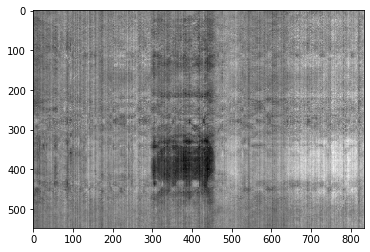

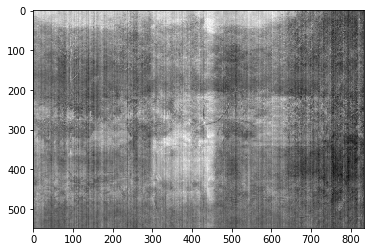

54.44896126379083


In [0]:
x= PCA2(grayimg,int((50/100)*dim))      #Reconstructed Image
x=x.astype('float')
imgplot= plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

y= grayimg - x                          #Error in Reconstructed Image
y=y.astype('float')
imgplot= plt.imshow(y, cmap=plt.get_cmap('gray'))
plt.show()

J2=np.linalg.norm(x,'fro')     
Reconstruct_Quality_2 = (J2/J)*100
print(Reconstruct_Quality_2)            #Frobenius Value of Reconstructed Image

In [0]:
x=np.shape(grayimg)[1]
ar=np.random.randint(x, size=(int((10/100)*x)))
print(ar)

[143 329 659 521  27 666 764 532  46 261  39 594 372 683 464 551 509 552
 286 651 538 621 245 211 400 636 735 500 722 197 356 790 170 241 569 554
 514 407 105   0 340 304 454 333 350 530 202 346 594 438 792 540 188 690
 582 179 188 315 444 794 826 642 648 555 141 499  99 237 758 460 249 501
 463 375 117 615 483 429  30 394 806   6 296]


In [0]:
# Performing PCA for all possible values with differnce of 5%

A = []            # A will have reconstruction error from top N% component
B = []            # B will have reconstruction error from Random N% component
X = []
for i in range(0,101,5):
  X.append(i)
  Y1 = grayimg - PCA1(grayimg,int((i/100)*dim))
  J3 = np.linalg.norm(Y1,'fro')

  Y2 = grayimg - PCA2(grayimg,int((i/100)*dim))  
  J4 = np.linalg.norm(Y2,'fro')
  ratio1 = (J3/J)*100
  ratio2 = (J4/J)*100
  A.append(ratio1)
  B.append(ratio2)
print(A,B,X)        

(0,)
(833, 833)
(41, 833, 1)
(833, 833)
(83, 833, 1)
(833, 833)
(124, 833, 1)
(833, 833)
(166, 833, 1)
(833, 833)
(208, 833, 1)
(833, 833)
(249, 833, 1)
(833, 833)
(291, 833, 1)
(833, 833)
(333, 833, 1)
(833, 833)
(374, 833, 1)
(833, 833)
(416, 833, 1)
(833, 833)
(458, 833, 1)
(833, 833)
(499, 833, 1)
(833, 833)
(541, 833, 1)
(833, 833)
(583, 833, 1)
(833, 833)
(624, 833, 1)
(833, 833)
(666, 833, 1)
(833, 833)
(708, 833, 1)
(833, 833)
(749, 833, 1)
(833, 833)
(791, 833, 1)
(833, 833)
(833, 833, 1)
(833, 833)
[100.0, 22.989126592094507, 18.87390753553008, 16.10853657607113, 14.150614870863299, 12.393500280093601, 11.134411272583092, 10.121096293047897, 9.433743317161122, 8.759758968259751, 8.19687957752831, 7.769838876408551, 7.318785419347157, 6.884648216986135, 7.170622777621909, 7.305063583601959, 7.4879665510365125, 8.139117556265383, 8.756746777606365, 8.813563363143073, 9.31904309715333] [100.0, 99.76765095166465, 99.12768046682731, 99.08936687744765, 96.89646588710453, 46.9895428

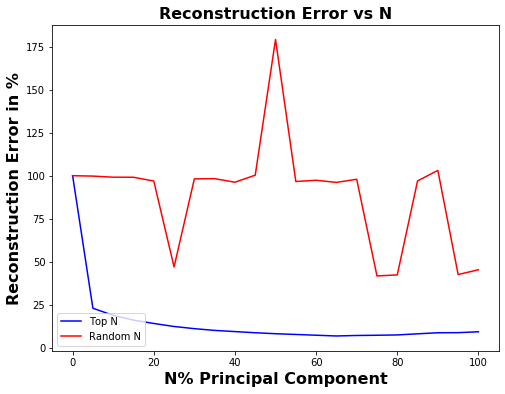

In [0]:
# Plot of Reconstruction Error vs Number of Principal Components for Top N% and Random N% component

plt.figure(1, figsize=(8,6))
plot_1 = plt.plot(X,A, color='blue', label="Top N")
plot_2 = plt.plot(X,B, color='red', label="Random N")
plt.xlabel('N% Principal Component', fontweight="bold", fontsize=16)
plt.legend(handles = [plot_1[0], plot_2[0]], loc="lower left")
plt.ylabel('Reconstruction Error in %', fontweight="bold", fontsize=16)
plt.title('Reconstruction Error vs N', fontweight="bold", fontsize=16)
plt.savefig('rec_err_n.png')
files.download('rec_err_n.png')